<a href="https://colab.research.google.com/github/AyresNishio/Metodos_Numericos_Python/blob/master/Solu%C3%A7%C3%A3o_de_EDOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Método Euler

In [ ]:
def func(x,y):
    dy_dx = (1/2)*np.exp(x/3) - (1/2)*y #Exemplo 9.2
    return dy_dx

In [ ]:
#Pvi
y0= 3
x0= 0
#intervalo
I = [0,5]

# Passo
h = 1 
# num_sub_int = 4
# h = (I[1] - I[0])/num_sub_int

In [ ]:
def euler(y0,x0,h,I):
    n =  (I[1] - I[0])/h
    x= []
    y= []
    x.append(x0)
    y.append(y0)
    print(f"(x0,y0) = ({x0}, {y0})")
    for i in range(int(n)):
        yk = y0+ h*func(x0,y0)
        print(f"(x{i+1},y{i+1}) = ({x0+h}, {yk})")
        y0 = yk
        x0 = x0 + h
        x.append(x0)
        y.append(y0)
    
    return x,y

In [ ]:
x,y = euler(y0,x0,h,I)

(x0,y0) = (0, 3)
(x1,y1) = (1, 2.0)
(x2,y2) = (2, 1.6978062125430449)
(x3,y3) = (3, 1.8227701267988603)
(x4,y4) = (4, 2.2705259776289526)
(x5,y5) = (5, 3.032096936156065)


## Euler modificado

In [ ]:
def euler_modif(y0,x0,h,I):
    n =  (I[1] - I[0])/h
    x= []
    y= []
    x.append(x0)
    y.append(y0)
    print(f"(x0,y0) = ({x0}, {y0})")
    for i in range(int(n)):
        yk_til = y0 + func(x0,y0)*h
        f_xy = func(x0,y0)
        x0 = x0 + h
        f_til_xy = func(x0,yk_til)
        k = (f_xy + f_til_xy)/2
        yk = y0+ k*h
        print(f"(x{i+1},y{i+1}) = ({x0}, {yk})")
        y0 = yk
        x.append(x0)
        y.append(y0)

    return x,y

In [ ]:
xm,ym = euler_modif(y0,x0,h,I)

(x0,y0) = (0, 3)
(x1,y1) = (1, 2.348903106271522)
(x2,y2) = (2, 2.1294495048191315)
(x3,y3) = (3, 2.253943152758553)
(x4,y4) = (4, 2.6969166727022706)
(x5,y5) = (5, 3.4834039198918236)


##Runge Kutta


In [ ]:
def rk4(y0,x0,h,I):
    n =  (I[1] - I[0])/h
    x= []
    y= []
    x.append(x0)
    y.append(y0)
    print(f"(x0,y0) = ({x0}, {y0})")
    for i in range(int(n)):
        k1= func(x0,y0)
        k2= func(x0 + (1/2)*h, y0 + (1/2)*k1*h)
        k3= func(x0 + (1/2)*h, y0 + (1/2)*k2*h)
        k4= func(x0 + h, y0 + k3*h)
        kmedia = (k1 + 2*k2 + 2*k3 + k4)/6
        yk = y0 + kmedia*h
        y0 = yk
        x0 = x0 + h
        print(f"(x{i+1},y{i+1}) = ({x0}, {yk})")
        x.append(x0)
        y.append(y0)

    return x,y

In [ ]:
xr,yr = rk4(y0,x0,h,I)

(x0,y0) = (0, 3)
(x1,y1) = (1, 2.293738642940936)
(x2,y2) = (2, 2.0524931152750945)
(x3,y3) = (3, 2.1675011724976767)
(x4,y4) = (4, 2.6020821741611937)
(x5,y5) = (5, 3.3748891281963176)


#Comparação de Resultados

In [ ]:
def func_analitica(x):
    dy_dx = 3/5*np.e**(x/3) + 2.4*np.e**(-x/2) 
    return dy_dx 

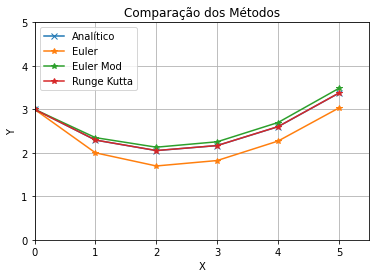

In [ ]:
_, ax = plt.subplots()
ax.set(xlabel ='X', ylabel ='Y',
    xlim =(0,5.5), ylim =(0, 5),
    title ='Comparação dos Métodos')
ax.grid()
ya = func_analitica(np.array(x))
plt.plot(x, ya, marker = 'x', label = 'Analítico')
plt.plot(x, y , marker = '*', label = 'Euler')
plt.plot(x, ym , marker = '*', label = 'Euler Mod')
plt.plot(x, yr , marker = '*', label = 'Runge Kutta')
plt.legend()
plt.show()  